In [80]:
%%capture --no-stderr
%pip install --quiet -U langgraph

## TypeDict

In [81]:
from typing_extensions import TypedDict

class TypedDictState(TypedDict):
    foo: str
    bar: str

In [82]:
from typing import Literal

class TypedDictState(TypedDict):
    name: str
    candy: Literal[ "JollyRancher" , "M&M's", "Skittles", "GummyBears", "Poppins"]

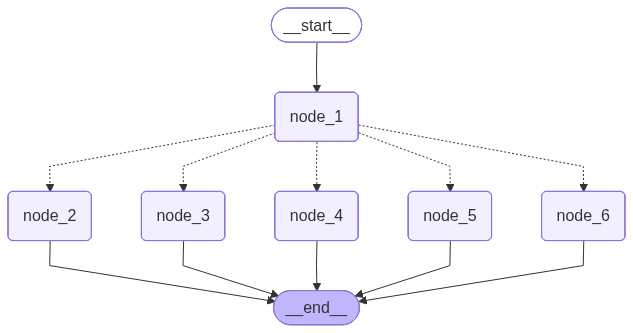

In [83]:
import random
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

def node_1(state):
    print("---Node 1---")
    return {"name": state['name'] + " likes"}

def node_2(state):
    print("---Node 2---")
    return {"candy": "JollyRancher"}

def node_3(state):
    print("---Node 3---")
    return {"candy": "M&M's"}

def node_4(state):
    print("---Node 4---")
    return {"candy": "Skittles"}

def node_5(state):
    print("---Node 5---")
    return {"candy": "GummyBears"}

def node_6(state):
    print("---Node 6---")
    return {"candy": "Poppins"}


def choose_candy(state) -> Literal["node_2", "node_3", "node_4", "node_5", "node_6"]:
        
    nodes=["node_2", "node_3", "node_4", "node_5", "node_6"]
    
    return random.choice(nodes)

# Build graph
builder = StateGraph(TypedDictState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("node_5", node_5)
builder.add_node("node_6", node_6)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", choose_candy)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
builder.add_edge("node_4", END)
builder.add_edge("node_5", END)
builder.add_edge("node_6", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [90]:
graph.invoke({"name":"arnavv"})

---Node 1---
---Node 5---


{'name': 'arnavv likes', 'candy': 'GummyBears'}

## Dataclass



In [91]:
from dataclasses import dataclass

@dataclass
class DataclassState:
    name: str
    candy: Literal[ "JollyRancher" , "M&M's", "Skittles", "GummyBears", "Poppins"]

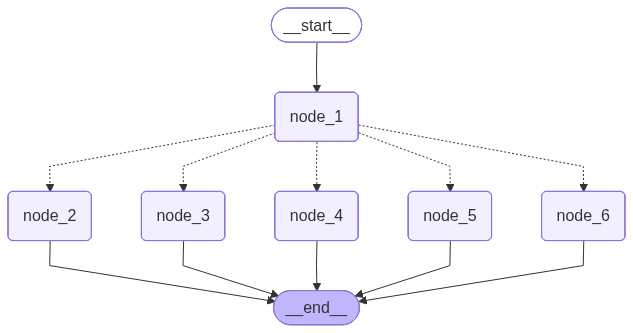

In [92]:
def node_1(state):
    print("---Node 1---")
    return {"name": state.name + " likes "}

# Build graph
builder = StateGraph(DataclassState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("node_5", node_5)
builder.add_node("node_6", node_6)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", choose_candy)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
builder.add_edge("node_4", END)
builder.add_edge("node_5", END)
builder.add_edge("node_6", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [94]:
graph.invoke(DataclassState(name="arnavv",candy="M&M's"))

---Node 1---
---Node 3---


{'name': 'arnavv likes ', 'candy': "M&M's"}

## Pydantic

In [96]:
dataclass_instance = DataclassState(name="arnavv", candy="Snickerss")
# This runs with no errors even though "Snickerss" is not in the candy list

In [ ]:
from pydantic import BaseModel, field_validator, ValidationError

class PydanticState(BaseModel):
    name: str
    candy: Literal[ "JollyRancher" , "M&M's", "Skittles", "GummyBears", "Poppins"] 

    @field_validator('candy')
    @classmethod
    def validate_mood(cls, value):
        # Ensure the mood is either "happy" or "sad"
        if value not in ["JollyRancher" , "M&M's", "Skittles", "GummyBears", "Poppins"]:
            raise ValueError("Each candy should be from the 'candy' list")
        return value

try:
    state = PydanticState(name="arnavv", candy="Snickers") #throws error
except ValidationError as e:
    print("Validation Error:", e)

Validation Error: 1 validation error for PydanticState
candy
  Input should be 'JollyRancher', "M&M's", 'Skittles', 'GummyBears' or 'Poppins' [type=literal_error, input_value='Snickers', input_type=str]
    For further information visit https://errors.pydantic.dev/2.12/v/literal_error


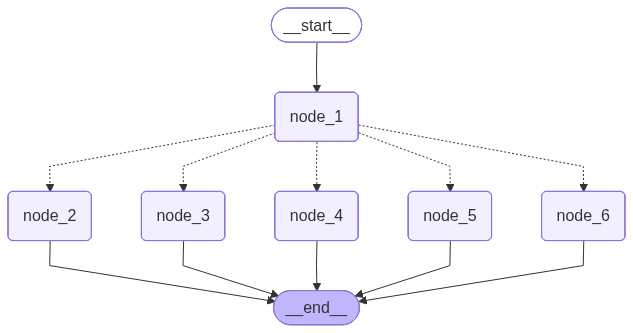

In [70]:
# Build graph
builder = StateGraph(PydanticState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("node_5", node_5)
builder.add_node("node_6", node_6)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", choose_candy)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
builder.add_edge("node_4", END)
builder.add_edge("node_5", END)
builder.add_edge("node_6", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [79]:
graph.invoke(PydanticState(name="arnavv",candy="JollyRancher"))

---Node 1---
---Node 2---


{'name': 'arnavv likes ', 'candy': 'JollyRancher'}